<a href="https://colab.research.google.com/github/rachkoshy/Machine-Learning/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#check if the file is loaded
import pandas as pd
df=pd.read_csv("train.csv")
df.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
#exploratory data analysis
#check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
#count missing values in each column
missing_values=df.isnull().sum()
#sort columns by number of missing values
missing_values.sort_values(ascending=False)
#show only columns that have missing values
missing_values[missing_values>0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [16]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include=['object']).columns
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
df['SalePrice'].describe()
#mean>50%(median) so most houses are moderately priced but a few expensie houses pull the average up

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


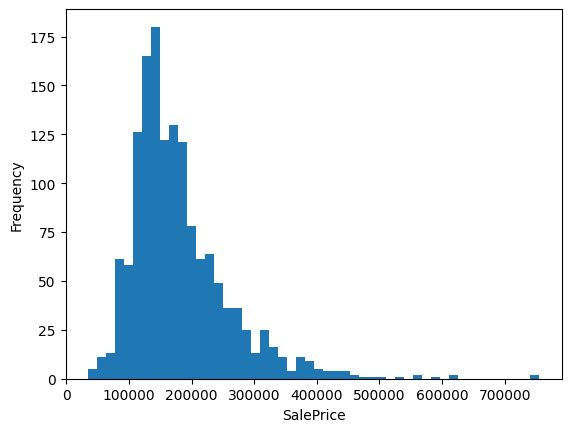

In [19]:
import matplotlib.pyplot as plt
plt.hist(df['SalePrice'], bins=50)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()
#outliers exist and will influence the model a lot

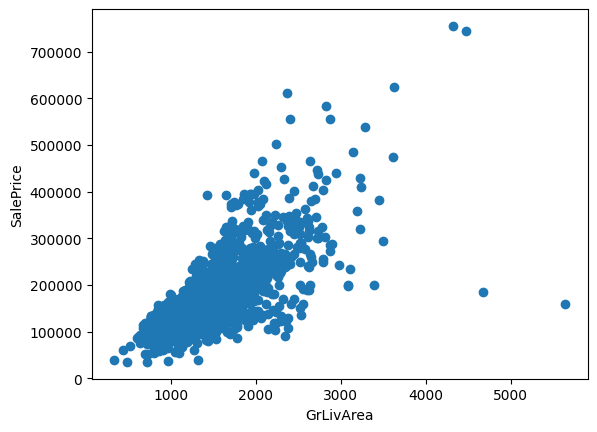

In [21]:
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()



In [29]:
#drop columns where most of the values are missing - more than 75%
columns_to_drop = ['Alley', 'Fence', 'MiscFeature']
df = df.drop(columns=columns_to_drop, errors='ignore')
#for categorical features missing -> fill "None"
columns_fill_none = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
                     'BsmtFinType1','BsmtFinType2','FireplaceQu',
                     'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC']
for col in columns_fill_none:
    df[col]=df[col].fillna('None')
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
#for numeric misisng values - fill with median
# 1. Fill LotFrontage with median
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

# 2. Fill MasVnrArea with median
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())

# 3. Handle GarageYrBlt
# If a house has no garage, GarageYrBlt is missing → fill with 0
# Otherwise, fill missing with median of GarageYrBlt
garage_median = df['GarageYrBlt'].median()  # median of existing values

df['GarageYrBlt'] = df.apply(
    lambda row: 0 if row['GarageType']=='None' else (garage_median if pd.isnull(row['GarageYrBlt']) else row['GarageYrBlt']),
    axis=1
)
total_missing=df.isnull().sum().sum()
print("Total missing values left:", total_missing)

Total missing values left: 0


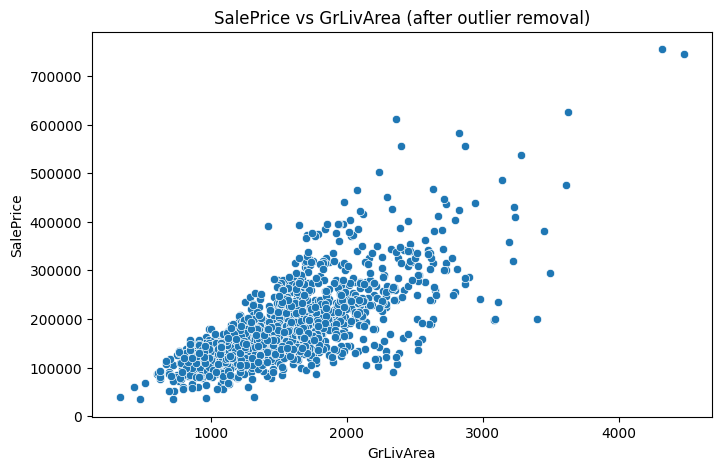

In [31]:
import seaborn as sns
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)
plt.figure(figsize=(8,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea (after outlier removal)')
plt.show()


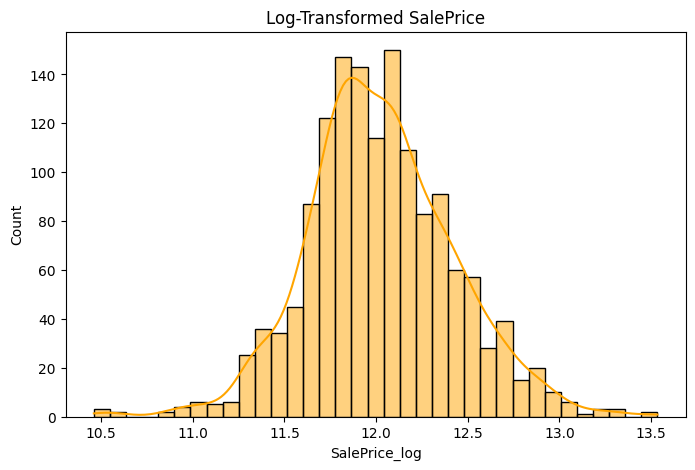

In [33]:

import numpy as np
df['SalePrice_log'] = np.log1p(df['SalePrice'])
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice_log'], kde=True, color='orange')
plt.title('Log-Transformed SalePrice')
plt.show()


In [38]:
# Compute correlations with SalePricetofind which numerical features matter the most
# Select the top 10 features
numeric_df=df.select_dtypes(include='number')
corr = numeric_df.corr()
top_corr = corr['SalePrice'].sort_values(ascending=False)
print(top_corr.head(10))


SalePrice        1.000000
SalePrice_log    0.948396
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
Name: SalePrice, dtype: float64


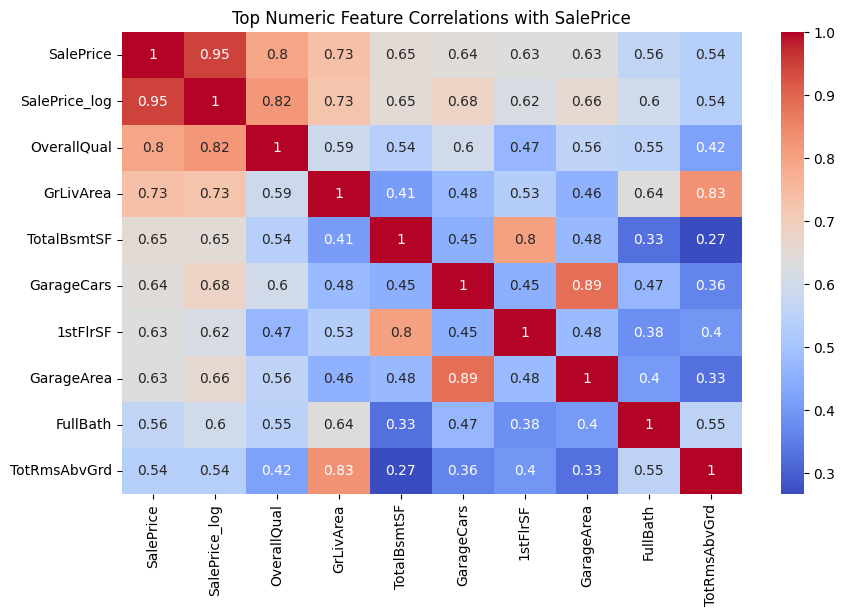

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(
    numeric_df[top_corr.head(10).index].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Top Numeric Feature Correlations with SalePrice')
plt.show()


So out of the 10 features:
Size related features - GrLivArea, 1stFLrSF, Total BsmtSF, TotRmsAbvGrd matter

Garage related - GarageCars, GarageArea
Quality related - OverallQual
Amenities - FullBath
From here only 1 garage feature is required - GarageCars and 1 primary size feature - GrLivArea

So final 5 features:
OverallQual
GrLivArea
GarageCars
FullBath
Target - np.log1p(df['SalePrice']) since the prices are right skewed

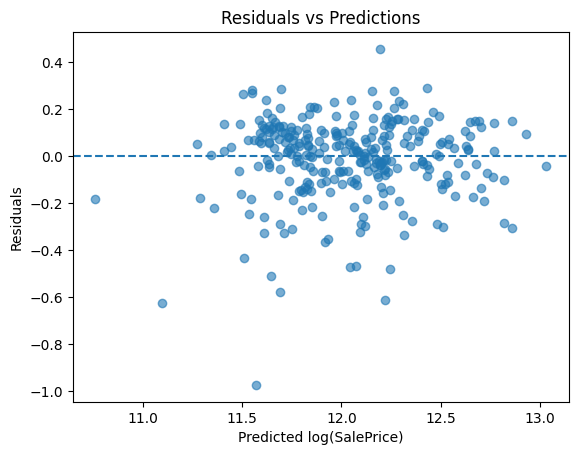

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Features and target
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'TotalBsmtSF']]
y = np.log1p(df['SalePrice'])

# Train–validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_val)

# Residuals
residuals = y_val - preds

# Residual plot
plt.scatter(preds, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted log(SalePrice)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()


In [44]:
rmse_log = np.sqrt(mean_squared_error(y_val, preds))
print("RMSE (log scale):", rmse_log)
rmse_price = np.sqrt(mean_squared_error(
    np.expm1(y_val),
    np.expm1(preds)
))
print("RMSE (price):", rmse_price)


RMSE (log scale): 0.17310419703369276
RMSE (price): 28817.240324171133


Modeled y=log(1+SalePrice)
e^0.173−1≈18.9%
Predictions are off by 18 - 19%
This is a baseline model.
For Kaggle House Prices:
Simple linear models usually land around 30–35k RMSE which means:
Feature engineering helped
Log transform helped
Feature selection was reasonable

Even though your linear regression baseline is decent, there are a few issues in real-world datasets:

Multicollinearity

Some features are correlated with each other (e.g., GrLivArea and TotalBsmtSF)

This can make coefficients unstable and sensitive to small changes in data.

Overfitting

With many features, the model can “chase noise” in the training data, hurting performance on unseen data.

Ridge and Lasso are tools to tame these problems.


Ridge RMSE (log scale): 0.17311409803244787
Ridge RMSE (price units): 28819.141257509396

Ridge coefficients:
 OverallQual    0.152333
GrLivArea      0.118215
GarageCars     0.081615
FullBath       0.010263
TotalBsmtSF    0.087157
dtype: float64

Lasso RMSE (log scale): 0.17382506521770308
Lasso RMSE (price units): 28761.56558563655

Lasso coefficients:
 OverallQual    0.151408
GrLivArea      0.115836
GarageCars     0.077976
FullBath       0.005628
TotalBsmtSF    0.081752
dtype: float64


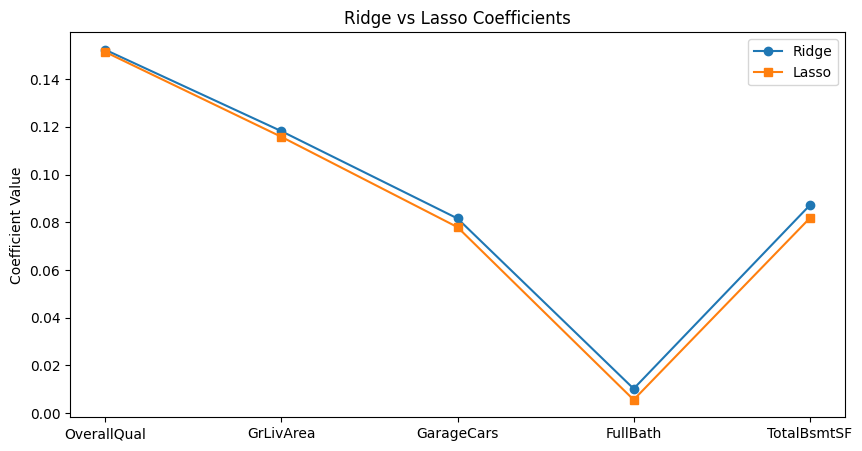

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# 5 key features
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'TotalBsmtSF']]
y = np.log1p(df['SalePrice'])  # log transform
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
ridge = Ridge(alpha=1.0)  # alpha can be tuned later
ridge.fit(X_train_scaled, y_train)

preds_ridge = ridge.predict(X_val_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_val, preds_ridge))
print("Ridge RMSE (log scale):", rmse_ridge)
print("Ridge RMSE (price units):",
      np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(preds_ridge))))

# Show coefficients
ridge_coef = pd.Series(ridge.coef_, index=X.columns)
print("\nRidge coefficients:\n", ridge_coef)
lasso = Lasso(alpha=0.01)  # small alpha, can tune
lasso.fit(X_train_scaled, y_train)

preds_lasso = lasso.predict(X_val_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_val, preds_lasso))
print("\nLasso RMSE (log scale):", rmse_lasso)
print("Lasso RMSE (price units):",
      np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(preds_lasso))))

# Show coefficients
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
print("\nLasso coefficients:\n", lasso_coef)
plt.figure(figsize=(10,5))
plt.plot(ridge_coef.values, 'o-', label='Ridge')
plt.plot(lasso_coef.values, 's-', label='Lasso')
plt.xticks(range(len(X.columns)), X.columns)
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso Coefficients")
plt.legend()
plt.show()


Observations:

OverallQual has the largest positive effect on log(SalePrice)

GrLivArea and TotalBsmtSF are important but slightly lower

FullBath has almost no effect (coefficient close to 0), which Lasso confirms

Ridge shrinks all coefficients a little; Lasso shrinks small ones more aggressively

Interpretation:

Bigger houses, better overall quality, more garage capacity → higher prices.
Extra bathrooms don’t move the needle much when other features are present.

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
# Numeric features (already cleaned)
num_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'TotalBsmtSF',
                '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

# Categorical features (use OneHotEncoding)
cat_features = ['Neighborhood', 'ExterQual', 'KitchenQual', 'GarageType', 'HouseStyle']

X = df[num_features + cat_features]
y = np.log1p(df['SalePrice'])  # log-transform target
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=1.0))
])

ridge_pipeline.fit(X_train, y_train)
preds_ridge = ridge_pipeline.predict(X_val)

rmse_ridge_log = np.sqrt(mean_squared_error(y_val, preds_ridge))
rmse_ridge_price = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(preds_ridge)))

print("Ridge RMSE (log scale):", rmse_ridge_log)
print("Ridge RMSE (price units):", rmse_ridge_price)
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.01, max_iter=10000))
])

lasso_pipeline.fit(X_train, y_train)
preds_lasso = lasso_pipeline.predict(X_val)

rmse_lasso_log = np.sqrt(mean_squared_error(y_val, preds_lasso))
rmse_lasso_price = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(preds_lasso)))

print("\nLasso RMSE (log scale):", rmse_lasso_log)
print("Lasso RMSE (price units):", rmse_lasso_price)
# Get numeric + categorical feature names after encoding
ohe_columns = list(lasso_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_features))
all_columns = num_features + ohe_columns

lasso_coefs = pd.Series(lasso_pipeline.named_steps['lasso'].coef_, index=all_columns)
print("\nLasso coefficients (non-zero only):\n", lasso_coefs[lasso_coefs != 0])


Ridge RMSE (log scale): 0.14848381755173476
Ridge RMSE (price units): 23929.161430623255

Lasso RMSE (log scale): 0.16206154391069702
Lasso RMSE (price units): 27088.06097002186

Lasso coefficients (non-zero only):
 OverallQual          0.110270
GrLivArea            0.133948
GarageCars           0.052788
TotalBsmtSF          0.069235
1stFlrSF             0.009529
YearBuilt            0.051268
YearRemodAdd         0.040133
GarageType_Attchd    0.003094
dtype: float64


Ridge improved a lot — RMSE dropped from 28,817 → 23,929

That’s about a 5k improvement, purely from adding more numeric + categorical features and scaling

Lasso did worse than Ridge here, because it shrinks small coefficients aggressively → some categorical features got nearly zeroed out

Ridge is the winner for this dataset in linear models

Lasso Interpretation
OverallQual → 0.11

GrLivArea → 0.13

GarageCars, TotalBsmtSF, 1stFlrSF, YearBuilt, YearRemodAdd → all positive, smaller

GarageType_Attchd → tiny effect (~0.003)

Key takeaways:

OverallQual and GrLivArea still dominate price

Lasso effectively removed unimportant categorical features, keeping model simpler

Ridge would keep all coefficients, slightly shrunk, which is why RMSE is lower

In [47]:
# Pick a random house from the dataset
random_house = df.sample(n=1, random_state=42)  # you can change seed
# Features for prediction
X_random = random_house[num_features + cat_features]

# True SalePrice
true_price = random_house['SalePrice'].values[0]
predicted_log_price = ridge_pipeline.predict(X_random)
predicted_price = np.expm1(predicted_log_price)
print(f"Random House True SalePrice: ${true_price:,.0f}")
print(f"Predicted SalePrice: ${predicted_price[0]:,.0f}")
print(f"Difference: ${abs(true_price - predicted_price[0]):,.0f}")

Random House True SalePrice: $190,000
Predicted SalePrice: $214,390
Difference: $24,390


What linear models cannot capture
Non-linear relationships:

Example: Very large houses (GrLivArea > 4000) might be worth disproportionately more than smaller houses. Linear model treats each square foot equally.

Feature interactions:
Example: A 2-car garage increases value more if OverallQual is high.

Linear model can’t automatically capture GrLivArea * OverallQual.


Complex categorical effects:
Neighborhoods, styles, conditions → some combinations matter more than others.

Ridge/Lasso treats them as additive contributions after OneHotEncoding.



Why tree-based models do better
Tree-based models (Random Forest, Gradient Boosting) split the feature space based on thresholds:

Example:

“If GrLivArea > 3000 → add 50k to predicted price”

“If Neighborhood = StoneBr → add 80k”

“If OverallQual > 7 AND GarageCars = 3 → add 40k”

Automatically capture:

Non-linearities (different slopes for different ranges)

Feature interactions (conditions on multiple columns)

Outliers (less sensitive than linear regression)

So even if Ridge improved by 5k after adding features, trees can exploit complex patterns and interactions your linear model cannot see → typically another 4–10k drop in RMSE.